In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [3]:
data = pd.read_csv("CustomersData.csv")
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Scatter plot between spending score and annual income:

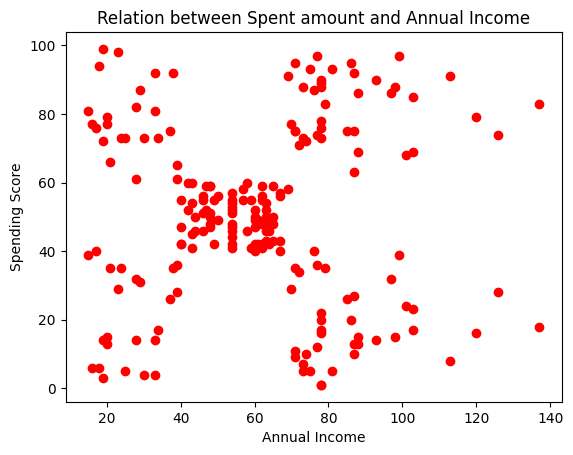

In [5]:
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], color = "red")
plt.title("Relation between Spent amount and Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

### Convert the spending score and annual income attributes in a array:

In [6]:
data_array = data.iloc[:, [3,4]].values
print(data_array)

IndexError: .iloc requires numeric indexers, got ['Annual Income (k$)' 'Spending Score (1-100)']

### Feature scaling on the resulting array:

In [151]:
# """ MIN MAX SCALING """ (for K-means)
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
min_max_scaled_data = min_max_scaler.fit_transform(data_array)
print ("\nAfter Min-Max Feature Scaling : \n", min_max_scaled_data)

# """ STANDARDIZATION """ (for DBSCAN)
Standardisation = preprocessing.StandardScaler()
standardized_data = Standardisation.fit_transform(data_array)
print ("\nAfter Standardisation : \n", standardized_data)


After Min-Max Feature Scaling : 
 [[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]
 [0.01639344 0.76530612]
 [0.02459016 0.05102041]
 [0.02459016 0.94897959]
 [0.03278689 0.02040816]
 [0.03278689 0.7244898 ]
 [0.03278689 0.13265306]
 [0.03278689 1.        ]
 [0.04098361 0.14285714]
 [0.04098361 0.7755102 ]
 [0.04098361 0.12244898]
 [0.04098361 0.79591837]
 [0.04918033 0.34693878]
 [0.04918033 0.66326531]
 [0.06557377 0.28571429]
 [0.06557377 0.98979592]
 [0.07377049 0.34693878]
 [0.07377049 0.73469388]
 [0.08196721 0.04081633]
 [0.08196721 0.73469388]
 [0.10655738 0.13265306]
 [0.10655738 0.82653061]
 [0.10655738 0.31632653]
 [0.10655738 0.6122449 ]
 [0.1147541  0.30612245]
 [0.1147541  0.87755102]
 [0.12295082 0.03061224]
 [0.12295082 0.73469388]
 [0.14754098 0.03061224]
 [0.14754098 0.92857143]
 [0.14754098 0.13265306]
 [0.14754098 0.81632653]
 [0.1557377  0.16326531]
 [0.1557377  0.73469388]
 [0.18032787 0.

### Elbow method to find appropriate value of k:

In [152]:
sum_of_squared_distance = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(min_max_scaled_data) 
    sum_of_squared_distance.append(kmeans.inertia_)

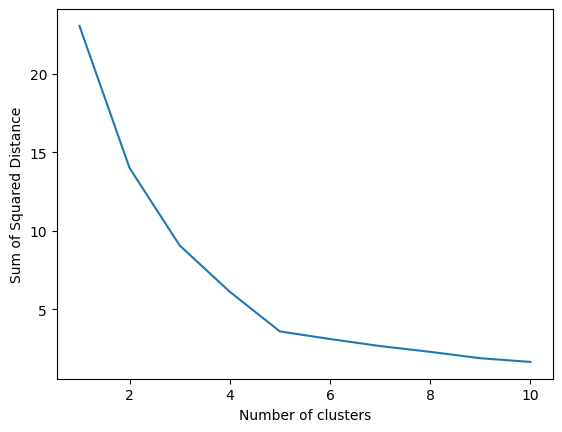

In [153]:
plt.plot(range(1, 11), sum_of_squared_distance) 
plt.xlabel('Number of clusters') 
plt.ylabel('Sum of Squared Distance') 
plt.show()

### Apply k-Means with the value of K found in last step:

In [154]:
kmeans = KMeans(n_clusters = 5, random_state = 0)
labels = kmeans.fit_predict(min_max_scaled_data)
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [155]:
print(kmeans.cluster_centers_)

[[0.6        0.16443149]
 [0.33029751 0.49508692]
 [0.58638083 0.82783883]
 [0.08792846 0.79962894]
 [0.09265859 0.20319432]]


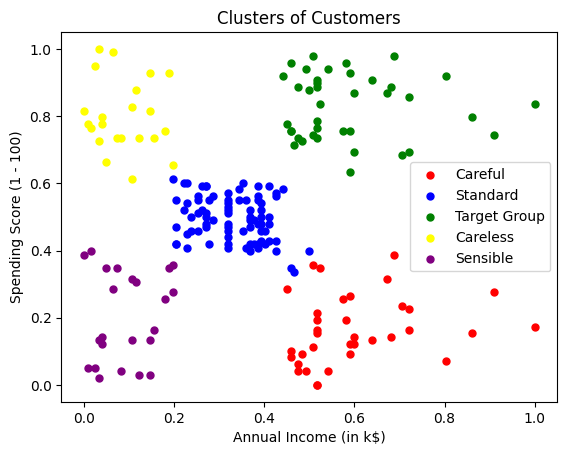

In [156]:
# plt.scatter(annual income, spending score, ...)
plt.scatter(min_max_scaled_data[labels == 0, 0], min_max_scaled_data[labels == 0, 1], s = 25, c = 'red', label = 'Careful')
plt.scatter(min_max_scaled_data[labels == 1, 0], min_max_scaled_data[labels == 1, 1], s = 25, c = 'blue', label = 'Standard')
plt.scatter(min_max_scaled_data[labels == 2, 0], min_max_scaled_data[labels == 2, 1], s = 25, c = 'green', label = 'Target Group')
plt.scatter(min_max_scaled_data[labels == 3, 0], min_max_scaled_data[labels == 3, 1], s = 25, c = 'yellow', label = 'Careless')
plt.scatter(min_max_scaled_data[labels == 4, 0], min_max_scaled_data[labels == 4, 1], s = 25, c = 'purple', label = 'Sensible')

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (in k$)")
plt.ylabel("Spending Score (1 - 100)")
plt.legend()
plt.show()

### Apply DBSCAN algorithm on the same dataset with epsilon = 0.4 and min_samples = 5:

In [157]:
db = DBSCAN(eps = 0.4, min_samples = 5)
labels = db.fit_predict(standardized_data)
print(labels)

[ 0  0  1  0  0  0  1 -1  1  0  1 -1  1  0  1  0  0  0  0 -1  0  0  1  0
  1  0  0  0  0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  0  2  0  2  3  2  3  2  0  2  3  2  3  2  3  2  3  2  0  2
  3  2  0  2  3  2  3  2  3  2  3  2  3  2  3  2  0  2  3  2  3  2  3  2
  3 -1  3  2  3  2  3  2  3  2  3  2  3  2  3  2 -1  2  3 -1  3  2  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [158]:
# Number clusters found by the algorithm
num_of_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"There are {num_of_clusters} clusters.")

There are 4 clusters.


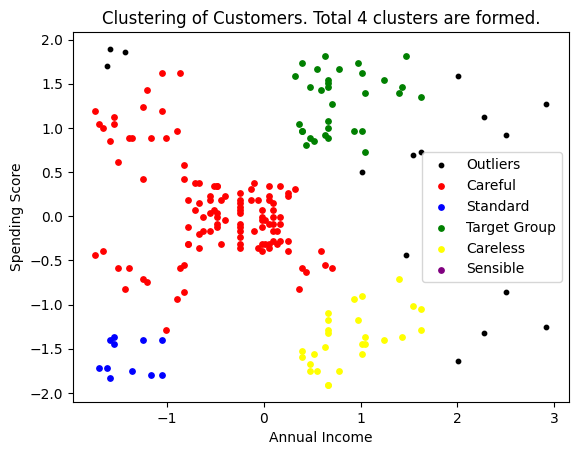

In [159]:
plt.scatter(standardized_data[labels == -1, 0], standardized_data[labels == -1, 1], s = 10, c = 'black', label = 'Outliers')
plt.scatter(standardized_data[labels == 0, 0], standardized_data[labels == 0, 1], s = 15, c = 'red', label = 'Careful')
plt.scatter(standardized_data[labels == 1, 0], standardized_data[labels == 1, 1], s = 15, c = 'blue', label = 'Standard')
plt.scatter(standardized_data[labels == 2, 0], standardized_data[labels == 2, 1], s = 15, c = 'green', label = 'Target Group')
plt.scatter(standardized_data[labels == 3, 0], standardized_data[labels == 3, 1], s = 15, c = 'yellow', label = 'Careless')
plt.scatter(standardized_data[labels == 4, 0], standardized_data[labels == 4, 1], s = 15, c = 'purple', label = 'Sensible')

plt.title(f"Clustering of Customers. Total {num_of_clusters} clusters are formed.")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()